# $6^{th}$ excercise

## Notebook setup

#### Used libraries

In [2]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt#### Reading and printing config files

#### Reading and printing config files

In [ ]:
def LoadConfig(path,T):
    d={}
    with open(path) as file:
        for line in file:
            (directive,key, val) = line.split()
            if(directive=="#define"): d[key] = (T)val
    return d

def PrintConf(d):
    for key, val in d.items(): print("{0:<19}{1}".format(key,val))

#### Colors, just for fun

In [3]:
stb = "#191724" #background
ndb = "#26233a" #object background
ste = "#e0def4" #main elements
nde = "#f6c177" #additional elements
rde = "#eb6f92" #element in evidence
err = "#908caa" #error bar
er2 = "#6e6a86" #second error bar

## 06.1 - 1D ising model
### Introductory notes

### Brief recap

---

### Equilibration

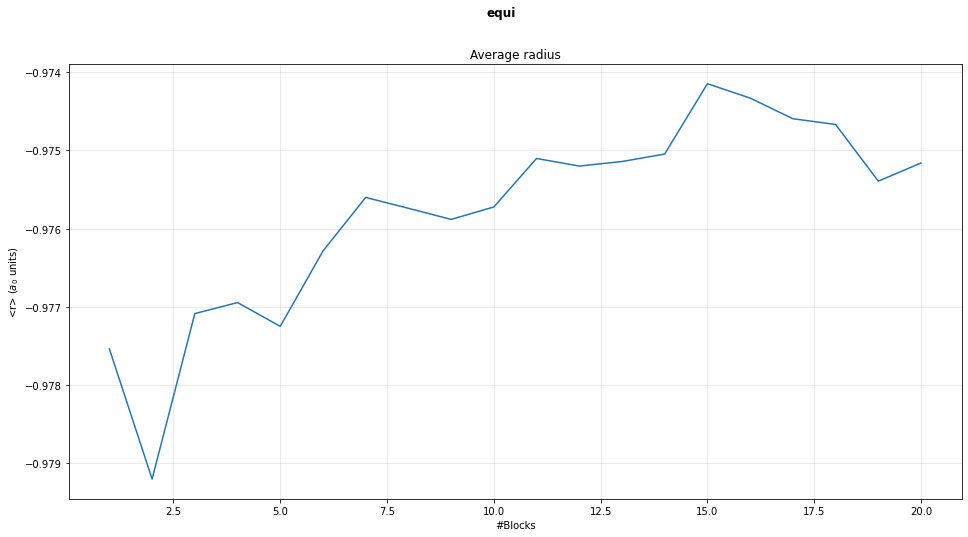

In [30]:
fig=plt.figure(figsize=(16, 8))
plt.suptitle('equi', weight='bold')

x,y,e=np.loadtxt("store/061-mrt2_ene-equi", usecols=(0,2,3), unpack=True )


#plt.hlines(1.5,0, conf_db["N_BLOCKS"],color=rde)
#posso mettere insieme a errorbar? ha senso cambiare tipo di grafico?
#plt.vlines(x,y-e,y+e,alpha=0.8)
plt.errorbar(x,y)

plt.xlabel('#Blocks')
plt.ylabel('<r> ($a_0$ units)')
plt.title("Average radius")
plt.grid(alpha=0.3)

## RIsultati

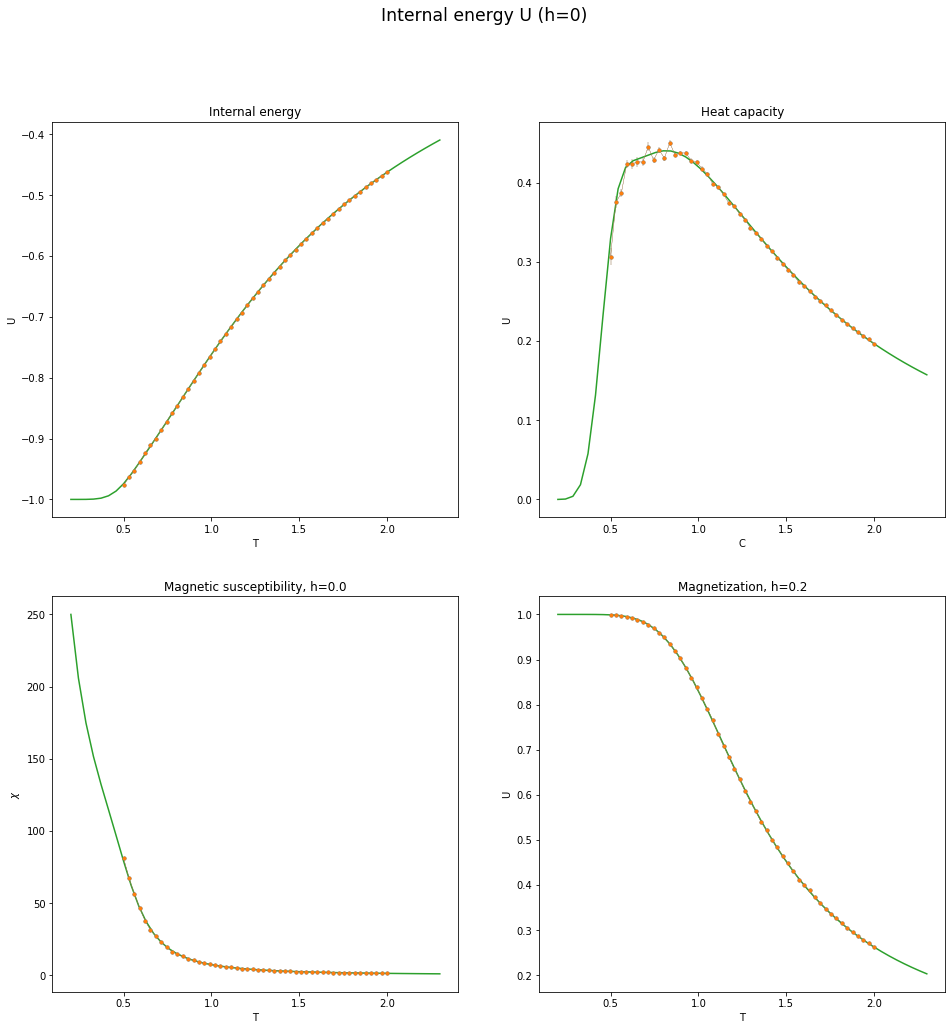

In [34]:
points=50
T = np.linspace(0.2,2.3,points)

##theorical quantities
beta = 1/T
b=beta
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

ene = -J*( th + ch*thN )/( 1 + thN )
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
chi = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

h=0.2
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns

mag = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)



plt.figure(figsize=(16,16))
plt.suptitle('Internal energy U (h=0)', size='xx-large')

x=np.linspace(0.5,2,points)
#Internal energy
ym,em = np.loadtxt("store/061-mrt2_ene-h=0.0", usecols=(2,3), unpack=True)
yg,eg = np.loadtxt("store/061-gibbs_ene-h=0.0", usecols=(2,3), unpack=True)

plt.subplot(221)
plt.errorbar(x,ym, yerr=em,linewidth = 0.3, marker = '.')
plt.errorbar(x,yg, yerr=eg,linewidth = 0.3, marker = '.')
plt.plot(T, ene)
plt.title('Internal energy')
plt.xlabel('T')
plt.ylabel('U')

#Heat capacity
ym,em = np.loadtxt("store/061-mrt2_heat-h=0.0", usecols=(2,3), unpack=True)
yg,eg = np.loadtxt("store/061-gibbs_heat-h=0.0", usecols=(2,3), unpack=True)

plt.subplot(222)
plt.errorbar(x,ym, yerr=em,linewidth = 0.3, marker = '.')
plt.errorbar(x,yg, yerr=eg,linewidth = 0.3, marker = '.')
plt.plot(T, heat)
plt.title('Heat capacity')
plt.xlabel('C')
plt.ylabel('U')

#Magnetic susceptibility
ym,em = np.loadtxt("store/061-mrt2_chi-h=0.0", usecols=(2,3), unpack=True)
yg,eg = np.loadtxt("store/061-gibbs_chi-h=0.0", usecols=(2,3), unpack=True)

plt.subplot(223)
plt.errorbar(x,ym, yerr=em,linewidth = 0.3, marker = '.')
plt.errorbar(x,yg, yerr=eg,linewidth = 0.3, marker = '.')
plt.plot(T, chi)
plt.title('Magnetic susceptibility, h=0.0')
plt.xlabel('T')
plt.ylabel('$\chi$')

#Magnetization
ym,em = np.loadtxt("store/061-mrt2_mag-h=0.2", usecols=(2,3), unpack=True)
yg,eg = np.loadtxt("store/061-gibbs_mag-h=0.2", usecols=(2,3), unpack=True)

plt.subplot(224)
plt.errorbar(x,ym, yerr=em,linewidth = 0.3, marker = '.')
plt.errorbar(x,yg, yerr=eg,linewidth = 0.3, marker = '.')
plt.plot(T, mag)
plt.title('Magnetization, h=0.2')
plt.xlabel('T')
plt.ylabel('U')

plt.show()
